#Ejercicio 2

*Dertiano Mercedes y Natasha Itzcovich*

**Aspectos generales:**

Recordar establecer los métodos de validación para cada punto.

Para ambos ejercicios, probar las siguientes funciones de Keras con sus hiperparámetros asociados:


*   Early stopping
*   Model checkpoint
*   Scheduling learning rate

También levantar las curvas de aprendizaje en Tensorboard. 



Evaluar el compartamiento del modelo utilizando diferentes técnicas de regularización como:

*   Drop out
*   Regularización L1
*   Regularización L2
*   Batch Normalization

**CONSIGNA:**

Para este ejercicio se provee una base de datos con los costos de la atención médica de pacientes. El objetivo es realizar una estimación del costo de la atención para un paciente dado. Para esto realizar:

<ol start = "1">
  <li> Regresión lineal </li>
  <li> Regresión lineal + feature engineering </li>
  <li> Regresión utilizando MLP </li>
    <ul type="none">
      <li> En este punto, tener en cuenta los siguientes elementos: </li>
        <ul>
          <li> Ingresar con una matríz de embeddings de dimensionalidad 2 sobre la región </li>
            <ul type="circle">
              <li> Monitorear con tensorboard la evolución de los mismos </li>
            </ul>
          <li> Topología e hiperparámetros </li>
            <ul type="circle">
              <li> Cantidad de capas </li>
              <li> Cantidad de neuronas por capa </li>
              <li> Funciones de activación </li>
              <li> Optimizadores (tipos, learning rate y beta)</li>
            </ul>
          <li> Buscar formas de darle interpretabilidad a la red (o a los parámetros aprendidos) </li>
        </ul>
    </ul>
</ol>

La **métrica principal** en este punto: Mean Absolute Error (MAE)



**Pregunta adicional:**

Comparar Mean Square Error (MSE) con Mean Absolute Error (MAE). ¿En qué suposición se basa cada una?

# Datos

In [1]:
#Montando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly as py

In [3]:
#Importando dataframe
df = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/Datasets/insurance.csv', delimiter=',')

In [4]:
#Viendo las primeras filas del dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*Variables del dataset:*

**Age:** edad del titular.

**Sex:** sexo del titular (f o m).

**BMI:** ICM del titular [kg/m^2].

**Children:** cantidad de niños incluidos en el plan de cobertura.

**Smoker:** condición de fumador del titular.

**Region:** región donde reside el titular en EEUU. Opciones: noreste, sureste, noroeste, suroeste.

**Charges:** costo individual del seguro médico.

Podemos destacar que 3 variables son de tipo categóricas: sex, smoker, region. Además, ninguna de estas es de tipo ordinal.

In [5]:
#Divido al dataset en 2:
#TRAIN 80% - TEST 20%
#Mas adelante divido VALID
from sklearn.model_selection import train_test_split

test_proportion = 0.2
atributos = df.iloc[:, 0:6] #tomo las primeras 6 columnas

x_train, x_test, y_train, y_test = train_test_split(atributos,df['charges'],test_size=test_proportion,shuffle=True)

In [6]:
x_train

,age,sex,bmi,children,smoker,region
722,62,male,37.400,0,no,southwest
928,62,female,39.160,0,no,southeast
563,50,male,44.770,1,no,southeast
1337,61,female,29.070,0,yes,northwest
968,21,male,25.745,2,no,northeast
...,...,...,...,...,...,...
585,33,female,28.270,1,no,southeast
375,23,female,28.310,0,yes,northwest
1297,28,female,26.510,2,no,southeast
56,58,female,31.825,2,no,northeast


In [7]:
x_test

,age,sex,bmi,children,smoker,region
184,44,male,30.690,2,no,southeast
497,45,male,28.700,2,no,southwest
322,34,male,30.800,0,yes,southwest
15,19,male,24.600,1,no,southwest
84,37,female,34.800,2,yes,southwest
...,...,...,...,...,...,...
1112,48,female,25.850,3,yes,southeast
940,18,male,23.210,0,no,southeast
767,42,female,29.000,1,no,southwest
962,63,female,35.200,1,no,southeast


## Analizando variables del subset *train*

In [8]:
#Alguna variable tiene valores nulos? --> NO
train=x_train.copy()
train['charges']=y_train
print(train.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3917285cd0>,
      dtype=object)

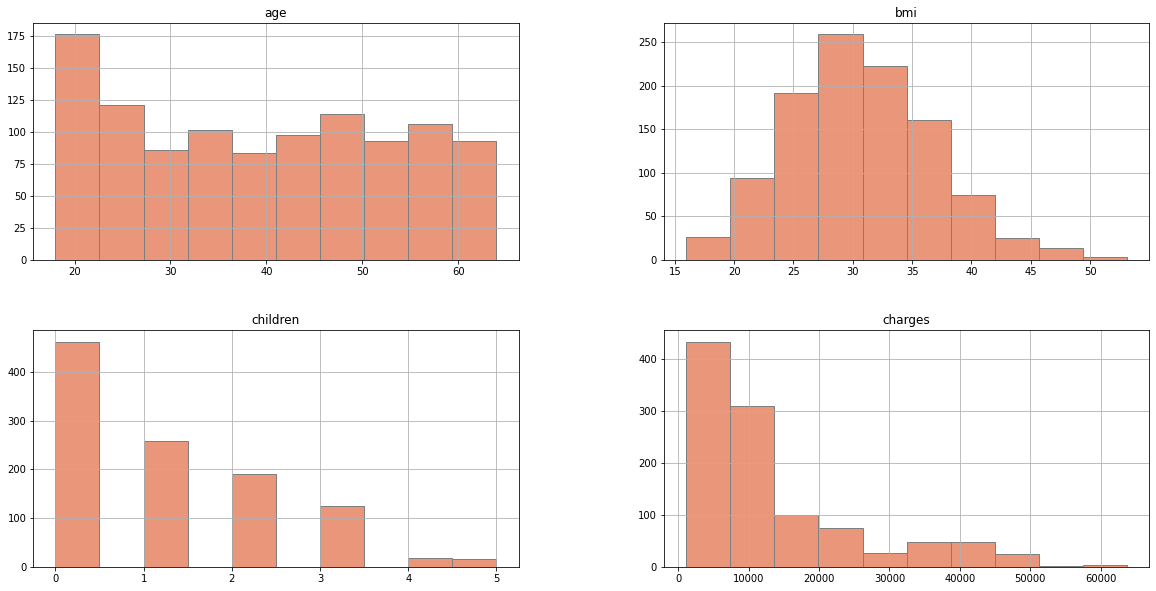

In [9]:
#Age - BMI - Children - Charges
train.hist(figsize = (20,10), grid=True, color = "darksalmon", linewidth=1, edgecolor='tab:grey')

male      0.51215
female    0.48785
Name: sex, dtype: float64

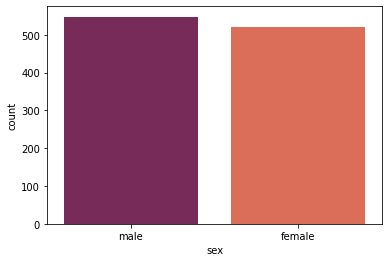

In [10]:
#Sex
sns.countplot(x='sex', data=train, palette="rocket")
train.sex.value_counts() / len(train)

no     0.794393
yes    0.205607
Name: smoker, dtype: float64

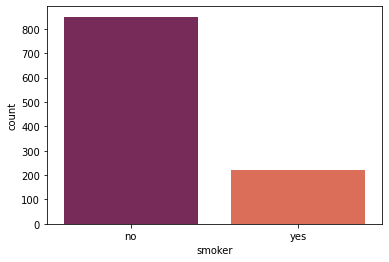

In [11]:
#Smoker
sns.countplot(x='smoker', data=train, palette="rocket")
train.smoker.value_counts() / len(train)

southeast    0.271028
northwest    0.245794
northeast    0.244860
southwest    0.238318
Name: region, dtype: float64

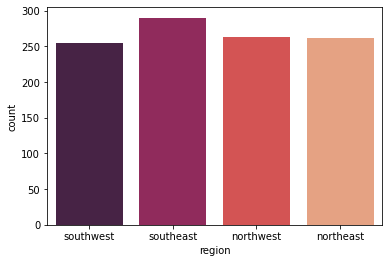

In [12]:
#Region
sns.countplot(x='region', data=train, palette="rocket")
train.region.value_counts() / len(train)

## Analizando relaciones entre variables




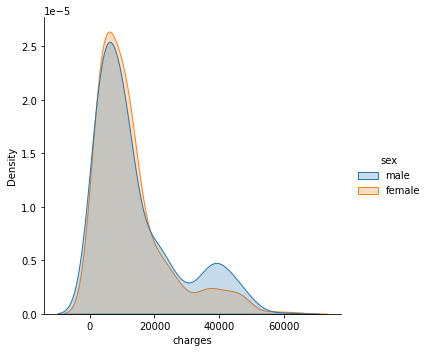

In [13]:
#SEX
sns.displot(train, x="charges", hue="sex", kind="kde", fill=True)

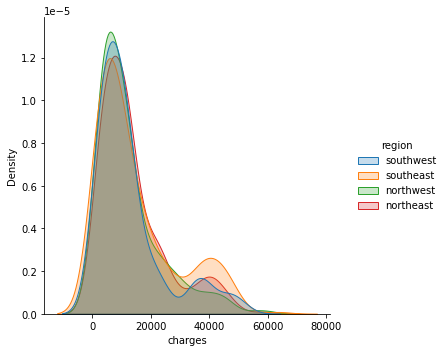

In [14]:
#REGION
sns.displot(train, x="charges", hue="region", kind="kde", fill=True)

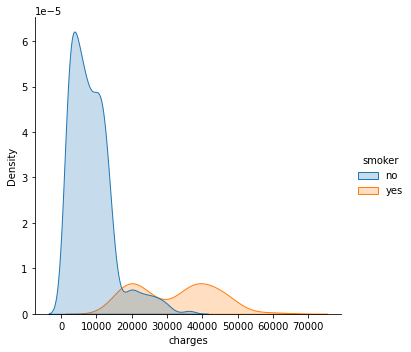

In [15]:
#SMOKER
sns.displot(train, x="charges", hue="smoker", kind="kde", fill=True)

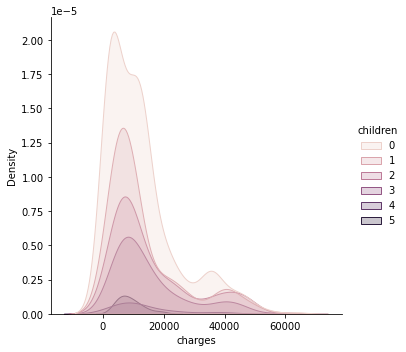

In [16]:
#CHILDREN
sns.displot(train, x="charges", hue="children", kind="kde", fill=True)

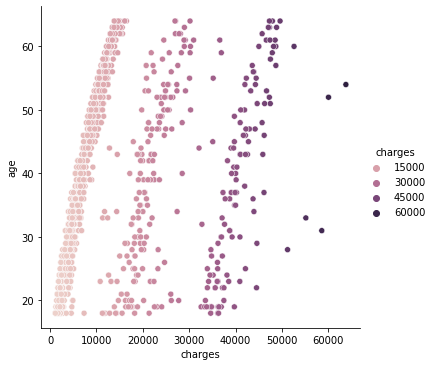

In [17]:
#EDAD
sns.relplot(x="charges", y="age", data=train, hue='charges')

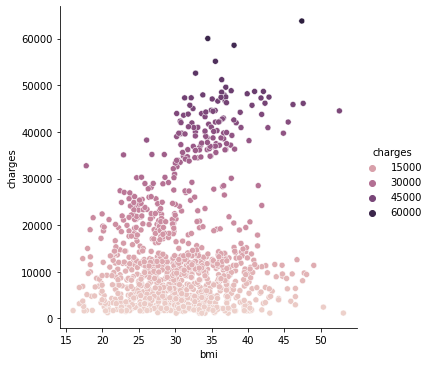

In [18]:
#Cargos vs ICM
sns.relplot(x="bmi", y="charges", data=train, hue='charges')

## Correlation plot

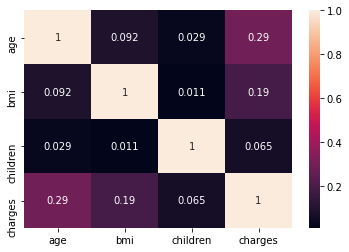

In [19]:
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)

# 1 - REGRESIÓN LINEAL 

In [21]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import SGD, Adam, schedules
import keras

In [36]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

#Curvas de aprendizaje
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  #PLOTTING MAE
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,1])
  plt.legend()

  #PLOTTING MSE
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,2])
  plt.legend()
  plt.show()

##Algo de feature engineering

Para realizar la regresión lineal es necesario pasar todos los datos tipo string a números.

In [26]:
#Copio subsets
train_x=x_train.copy()
test_x=x_test.copy()
train_y=y_train.copy()
test_y=y_test.copy()
#One Hot Encoder
train_x=pd.get_dummies(train_x, columns=['sex','smoker','region'])
test_x=pd.get_dummies(test_x, columns=['sex','smoker','region'])

## model1

In [38]:
#Definición + compilación
#Cantidad de parámetros de entrada:
n = train_x.shape[1]
def build_model():
  model = Sequential([Dense(n, input_dim=n)])
  optimizer=Adam(learning_rate=0.001) ############# OPTIMIZADOR y LEARNING RATE
  model.compile(loss='mse',optimizer=optimizer, metrics=['mae', 'mse'])
  return model
model1 = build_model()
model1.summary()
#Entrenamiento
EPOCHS = 1000 ############# CANTIDAD EPOCHS

print('')
print('Comenzando entrenamiento del modelo')
history1 = model1.fit(train_x, train_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                132       
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________

Comenzando entrenamiento del modelo

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......

In [34]:
hist = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch
print('')
print('loss=MSE train')
print('val_loss=MSE valid')
hist.tail()


loss=MSE train
val_loss=MSE valid


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,262143696.0,11101.779297,262143696.0,318294368.0,12556.310547,318294368.0,995
996,262096896.0,11099.862305,262096896.0,318241568.0,12554.332031,318241568.0,996
997,262050400.0,11097.924805,262050400.0,318188864.0,12552.353516,318188864.0,997
998,262003632.0,11096.022461,262003632.0,318136448.0,12550.387695,318136448.0,998
999,261956912.0,11094.124023,261956912.0,318084480.0,12548.438477,318084480.0,999


Curvas de aprendizaje


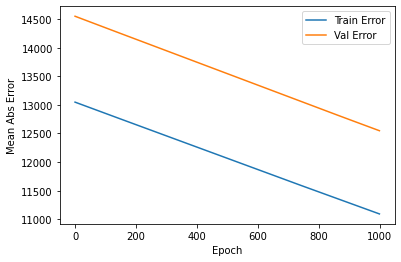

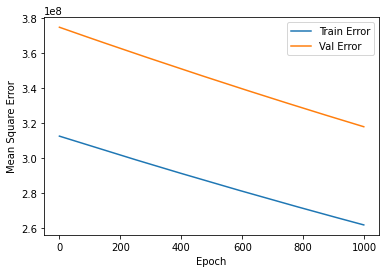

In [37]:
print('Curvas de aprendizaje')
plot_history(history1)

## Early stopping


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

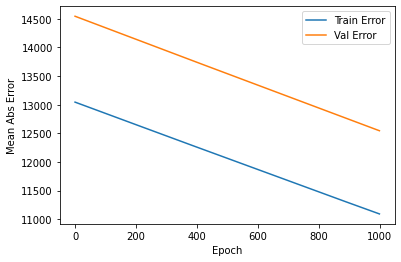

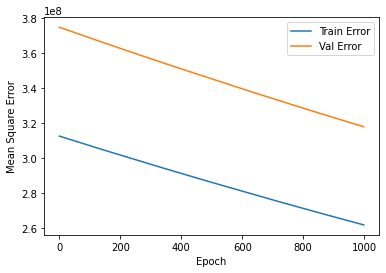

In [40]:
model1ES = build_model()

early_stop1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history1ES = model1ES.fit(train_x, train_y, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop1, PrintDot()])

plot_history(history1ES)

In [42]:
#Evaluando en subset test sin early stopping
loss, mae, mse = model1.evaluate(test_x, test_y, verbose=2)
print("Testing set Mean Abs Error without ES: {:5.2f}".format(mae))
#Evaluando en subset test con early stopping
loss, mae, mse = model1ES.evaluate(test_x, test_y, verbose=2)
print("Testing set Mean Abs Error with ES: {:5.2f}".format(mae))

9/9 - 0s - loss: 261986400.0000 - mae: 11004.9893 - mse: 261986400.0000
Testing set Mean Abs Error without ES: 11004.99
9/9 - 0s - loss: 261890480.0000 - mae: 11001.1748 - mse: 261890480.0000
Testing set Mean Abs Error with ES: 11001.17


### Learning rate schedule


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

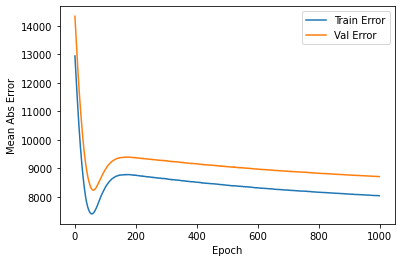

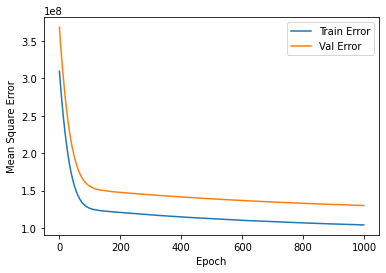

In [45]:
initial_learning_rate = 0.1
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

model1LRS = Sequential([Dense(1, input_dim=n)])
model1LRS.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='mse',
              metrics=['mae', 'mse'])

history1LRS = model1LRS.fit(train_x, train_y, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

plot_history(history1LRS)

In [46]:
#Evaluando en subset test sin LRS
loss, mae, mse = model1.evaluate(test_x, test_y, verbose=2)
print("Testing set Mean Abs Error without ES: {:5.2f}".format(mae))
#Evaluando en subset test con LRS
loss, mae, mse = model1LRS.evaluate(test_x, test_y, verbose=2)
print("Testing set Mean Abs Error with ES: {:5.2f}".format(mae))

9/9 - 0s - loss: 261986400.0000 - mae: 11004.9893 - mse: 261986400.0000
Testing set Mean Abs Error without ES: 11004.99
9/9 - 0s - loss: 105547920.0000 - mae: 8046.1118 - mse: 105547920.0000
Testing set Mean Abs Error with ES: 8046.11


# 2 - REGRESIÓN LINEAL + FEATURE ENGINEERING

## HOV

Paso variables categóricas a un nuevo formato.

Este paso fue realizado previamente por compatibilidad de datos.

## Normalización

In [47]:
train_stats = train_x.describe()
train_stats = train_stats.transpose()

In [48]:
def norm_x(x):
  return (x - train_stats['mean']) / train_stats['std'] #USO LA MEDIA Y DESVIO ESTANDAR DE TRAIN PARA NORMALIZAR TEST Y VALID
train_xN = norm_x(train_x)
test_xN = norm_x(test_x)
def norm_y(y):
  return (y - y.mean()) / y.std() #USO LA MEDIA Y DESVIO ESTANDAR DE TRAIN PARA NORMALIZAR TEST Y VALID
train_yN = norm_y(train_y)
test_yN = norm_y(test_y)

## model2

In [49]:
#Definición + compilación
#Cantidad de parámetros de entrada:
nN = train_xN.shape[1]
def build_model():
  model = Sequential([Dense(nN, input_dim=nN)])
  optimizer=Adam(learning_rate=0.001) ############# OPTIMIZADOR y LEARNING RATE
  model.compile(loss='mse',optimizer=optimizer, metrics=['mae', 'mse'])
  return model
model2 = build_model()
model2.summary()
#Entrenamiento
EPOCHS = 1000 ############# CANTIDAD EPOCHS

print('')
print('Comenzando entrenamiento del modelo')
history2 = model2.fit(train_xN, train_yN, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 11)                132       
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________

Comenzando entrenamiento del modelo

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......

In [50]:
hist = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch
print('')
print('loss=MSE train')
print('val_loss=MSE valid')
hist.tail()


loss=MSE train
val_loss=MSE valid


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.243222,0.343709,0.243222,0.290268,0.359056,0.290268,995
996,0.243466,0.344440,0.243466,0.290354,0.360159,0.290354,996
997,0.243322,0.344276,0.243322,0.289381,0.358886,0.289381,997
998,0.243358,0.344393,0.243358,0.290183,0.359683,0.290183,998
999,0.243284,0.344368,0.243284,0.288916,0.358158,0.288916,999


Curvas de aprendizaje


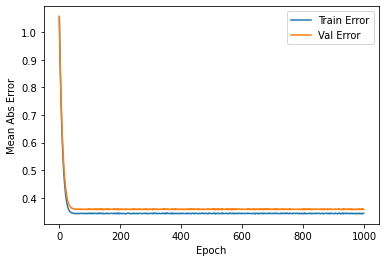

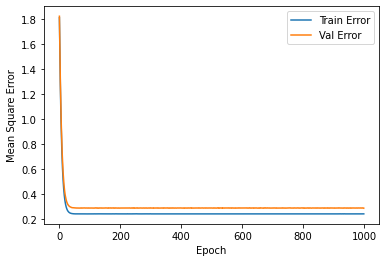

In [51]:
print('Curvas de aprendizaje')
plot_history(history2)

In [61]:
#Evaluando en subset test sin normalizar
loss, mae, mse = model1.evaluate(test_x, test_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))
#Evaluando en subset test normalizando
loss, mae, mse = model2.evaluate(test_xN, test_yN, verbose=2)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

9/9 - 0s - loss: 261986400.0000 - mae: 11004.9893 - mse: 261986400.0000
Testing set Mean Abs Error: 11004.99
9/9 - 0s - loss: 0.2381 - mae: 0.3262 - mse: 0.2381
Testing set Mean Abs Error:  0.33


### Early stopping


...............................................................................

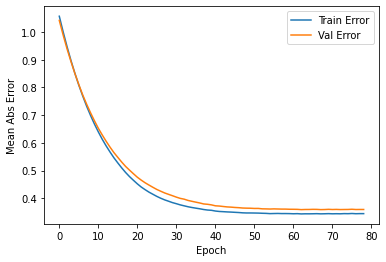

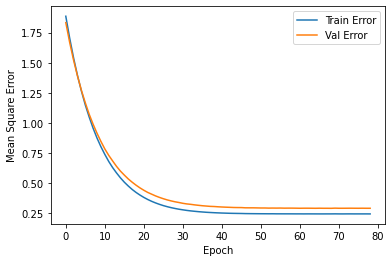

In [54]:
model2ES = build_model()

early_stop2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history2ES = model2ES.fit(train_xN, train_yN, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop2, PrintDot()])

plot_history(history2ES)

In [57]:
#Evaluando en subset test sin early stopping
loss, mae, mse = model2.evaluate(test_xN, test_yN, verbose=2)
print("Testing set Mean Abs Error without ES: {:5.2f}".format(mae))
#Evaluando en subset test con early stopping
loss, mae, mse = model2ES.evaluate(test_xN, test_yN, verbose=2)
print("Testing set Mean Abs Error with ES: {:5.2f}".format(mae))

9/9 - 0s - loss: 0.2381 - mae: 0.3262 - mse: 0.2381
Testing set Mean Abs Error without ES:  0.33
9/9 - 0s - loss: 0.2380 - mae: 0.3273 - mse: 0.2380
Testing set Mean Abs Error with ES:  0.33


### Learning Rate schedule


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

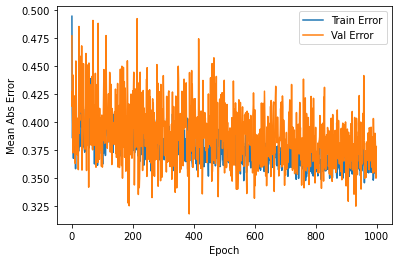

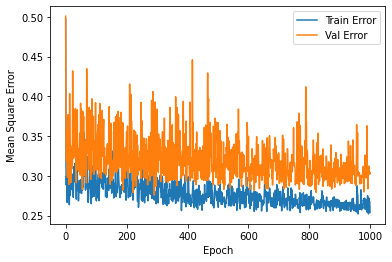

In [55]:
model2LRS = Sequential([Dense(1, input_dim=n)])
model2LRS.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='mse',
              metrics=['mae', 'mse'])

history2LRS = model2LRS.fit(train_xN, train_yN, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

plot_history(history2LRS)

In [59]:
#Evaluando en subset test sin LRS
loss, mae, mse = model2.evaluate(test_xN, test_yN, verbose=2)
print("Testing set Mean Abs Error without LRS: {:5.2f}".format(mae))
#Evaluando en subset test con LRS
loss, mae, mse = model2LRS.evaluate(test_xN, test_yN, verbose=2)
print("Testing set Mean Abs Error with LRS: {:5.2f}".format(mae))

9/9 - 0s - loss: 0.2381 - mae: 0.3262 - mse: 0.2381
Testing set Mean Abs Error without LRS:  0.33
9/9 - 0s - loss: 0.2529 - mae: 0.3417 - mse: 0.2529
Testing set Mean Abs Error with LRS:  0.34


# 3 - MLP



## Cantidad de capas

## Cantidad de neuronas por capa

## Funciones de activación

## Optimizadores (tipos, learning rate y beta)

In [ ]:
# Matriz de embbedings

# Técnicas de regularizacion

## Drop Out

#L1

#L2

## Batch Normalization